Data Loading: Start by loading the datasets "purchase.csv", "boxes.csv" and "problem_3_df" into our Python environment. 

In [2]:
# Importing required libraryes 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading purchase data
purchase_df = pd.read_csv("purchase.csv")

# Loading boxes data
boxes_df = pd.read_csv("boxes.csv")

# Loading problem 3 data
problem_3_df = pd.read_csv("problem 3.csv")

Data Exploration: Explore the datasets to understand their structure, contents, and any potential issues. Check for missing values, data types, and inconsistencies.

In [3]:
# Viewing some rows of problem_3 data frame.
problem_3_df

,MAGIC_KEY
0,2BCFE9C06A7
1,2C2A872B5A2
2,2C6A897671B
3,2C6F1287F53
4,2C658198CC9
...,...
5374,2C0804EFE49
5375,2C080B48630
5376,2C08243C58E
5377,2C082C78575


In [4]:
# Converting hexadecimal strings in 'MAGIC_KEY' column of problem_3_df to integers
problem_3_df['MAGIC_KEY_int'] = problem_3_df['MAGIC_KEY'].apply(lambda x: int(x, 16))
problem_3_df

,MAGIC_KEY,MAGIC_KEY_int
0,2BCFE9C06A7,3010748745383
1,2C2A872B5A2,3035073000866
2,2C6A897671B,3052255274779
3,2C6F1287F53,3053472743251
4,2C658198CC9,3050904849609
...,...,...
5374,2C0804EFE49,3025809636937
5375,2C080B48630,3025816290864
5376,2C08243C58E,3025842455950
5377,2C082C78575,3025851090293


In [5]:
# Displaying first few rows of purchase data
print(purchase_df.head())

# Displaying first few rows of boxes data
print(boxes_df.head())

# Displaying basic statistics of purchase data
print(purchase_df.describe())

# Checking for missing values
print(purchase_df.isnull().sum())

# Checking data types
print(purchase_df.dtypes)

  PURCHASE_DATE    MAGIC_KEY  BOX_ID  BOX_COUNT
0      1/2/2019  2CED678A247    12.0        1.0
1      1/2/2019  2BF58D91BA1    12.0        1.0
2      1/2/2019  2C15B86534E    99.0        1.0
3      1/2/2019  2C32D9A859A     6.0        1.0
4      1/2/2019  2C7A55404D1     4.0        1.0
   BOX_ID  QUALITY      DELIVERY_OPTION  MILK  MEAT  UNIT_PRICE
0       1  Premium  Home Delivery - CoD   0.0   2.7        9.96
1       2  Premium  Home Delivery - CoD   0.0   2.3       11.96
2       3  Premium  Home Delivery - CoD   0.0   2.4       11.96
3       4  Premium  Home Delivery - CoD   0.0   2.5       11.96
4       5  Premium  Home Delivery - CoD   0.0   2.6       11.96
             BOX_ID     BOX_COUNT
count  2.455817e+06  2.455817e+06
mean   2.308802e+02  1.001121e+00
std    2.923330e+04  4.467255e-02
min    1.000000e+00 -1.000000e+00
25%    1.060000e+02  1.000000e+00
50%    1.430000e+02  1.000000e+00
75%    2.150000e+02  1.000000e+00
max    1.111111e+07  1.900000e+01
PURCHASE_DATE     0
MA

Data Preprocessing: Preprocessing the datasets to make them suitable for analysis. It's including handling missing values, converting data types, merging datasets, etc.

In [6]:
# Merge purchase data with boxes data on 'BOX_ID'
merged_df = pd.merge(purchase_df, boxes_df, on='BOX_ID', how='left')

# Convert hexadecimal strings in 'MAGIC_KEY' column of merged_df to integers
merged_df['MAGIC_KEY_int'] = merged_df['MAGIC_KEY'].apply(lambda x: int(x, 16))

# Convert date columns to datetime objects
merged_df['PURCHASE_DATE'] = pd.to_datetime(merged_df['PURCHASE_DATE'], format='%d/%m/%Y')

In [7]:
# Viewing some rows of merged_df data frame.
merged_df

,PURCHASE_DATE,MAGIC_KEY,BOX_ID,BOX_COUNT,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE,MAGIC_KEY_int
0,2019-02-01,2CED678A247,12.0,1.0,Premium,Home Delivery - CoD,8.0,1.5,12.98,3087384748615
1,2019-02-01,2BF58D91BA1,12.0,1.0,Premium,Home Delivery - CoD,8.0,1.5,12.98,3020852632481
2,2019-02-01,2C15B86534E,99.0,1.0,Premium,Delivery from Collection Point,0.0,3.3,13.96,3029487473486
3,2019-02-01,2C32D9A859A,6.0,1.0,Premium,Home Delivery - CoD,0.0,2.7,11.96,3037306979738
4,2019-02-01,2C7A55404D1,4.0,1.0,Premium,Home Delivery - CoD,0.0,2.5,11.96,3056495494353
...,...,...,...,...,...,...,...,...,...,...
2455859,2018-10-28,2BD992B5538,12.0,1.0,Premium,Home Delivery - CoD,8.0,1.5,12.98,3013341828408
2455860,2018-10-28,2C97CD72233,17.0,1.0,Premium,Home Delivery - CoD,10.0,1.8,12.98,3064406155827
2455861,2018-10-28,2C91C61D372,40.0,1.0,Premium,Home Delivery - CoD,12.0,1.8,19.98,3062787855218
2455862,2018-10-28,2CD70CFC4E3,51.0,1.0,Premium,Home Delivery - CoD,18.0,2.9,23.98,3081384215779


In [30]:
# Checking for missimg values of each column in merged_df
merged_df.isnull().sum()

PURCHASE_DATE       0
MAGIC_KEY           0
BOX_ID             47
BOX_COUNT          47
QUALITY            64
DELIVERY_OPTION    64
MILK               64
MEAT                0
UNIT_PRICE         64
MAGIC_KEY_int       0
MONTH               0
YEAR                0
dtype: int64

In [31]:
# Filling null values with the mean of the column
merged_df['MEAT'].fillna(merged_df['MEAT'].mean(), inplace=True)
merged_df['MILK'].fillna(merged_df['MILK'].mean(), inplace=True)
merged_df['UNIT_PRICE'].fillna(merged_df['UNIT_PRICE'].mean(), inplace=True)

Feature Engineering: Createing new features or derive insights from existing ones that might be useful for analysis and prediction.

In [32]:
# Extracting month and year from 'PURCHASE_DATE'
merged_df['MONTH'] = merged_df['PURCHASE_DATE'].dt.month
merged_df['YEAR'] = merged_df['PURCHASE_DATE'].dt.year

Data Analysis: Analyze the datasets to understand patterns, trends, and relationships between variables. 

In [33]:
# Calculating total quantity of meat purchased in February 2019
february_2019_data = merged_df[(merged_df['MONTH'] == 2) & (merged_df['YEAR'] == 2019)]
total_meat_purchased_feb_2019 = february_2019_data['MEAT'].sum()
print("Total quantity of meat purchased in February 2019:", total_meat_purchased_feb_2019)

Total quantity of meat purchased in February 2019: 1269461.8005438552


In [34]:
# Calculating the meat sales amount for each month
monthly_meat_sales = merged_df.groupby(['YEAR', 'MONTH'])['MEAT'].sum().reset_index()

# Calculating the Month-on-Month meat sales growth%
monthly_meat_sales['GROWTH'] = monthly_meat_sales['MEAT'].pct_change()

# Calculating the average growth%
avg_growth = monthly_meat_sales['GROWTH'].mean()

print('Average Month-on-Month meat sales amount growth%: {:.2f}%'.format(avg_growth * 100))

Average Month-on-Month meat sales amount growth%: 11.87%


In [35]:
# Filtering the data for the month of January 2019
jan_data = merged_df[(merged_df['MONTH'] == 1) & (merged_df['YEAR'] == 2019)]

# Calculating the daily average milk sale amount for Sunday and Tuesday
sunday_avg = jan_data[jan_data['PURCHASE_DATE'].dt.dayofweek == 6]['MILK'].mean()
tuesday_avg = jan_data[jan_data['PURCHASE_DATE'].dt.dayofweek == 1]['MILK'].mean()

difference = sunday_avg - tuesday_avg

difference

-0.11138356489318912

In [36]:
# Filtering the data for the month of November 2018
nov_data = merged_df[(merged_df['MONTH'] == 11) & (merged_df['YEAR'] == 2018)]

# Grouping by BOX_ID and sum the sales
top_selling_box = nov_data.groupby('BOX_ID')['BOX_COUNT'].sum().idxmax()
top_selling_box

163.0

In [37]:
# Filtering the data for December 2018
dec_18_data = merged_df[(merged_df['PURCHASE_DATE'].dt.month == 12) & (merged_df['PURCHASE_DATE'].dt.year == 2018)]

# Finding the third highest sold box
third_highest_box = dec_18_data['BOX_COUNT'].nlargest(3).iloc[-1]

# Geting the unit price of the third highest sold box
unit_price_third_highest = dec_18_data[dec_18_data['BOX_COUNT'] == third_highest_box]['UNIT_PRICE'].values[0]
unit_price_third_highest

5.56

In [38]:
# Filtering data for the first 15 days of March-2019
first_15_march_2019_data = merged_df[(merged_df['PURCHASE_DATE'] >= '2019-03-01') & (merged_df['PURCHASE_DATE'] <= '2019-03-15')]

# Filtering data for customers in problem 3 data
problem_3_data = first_15_march_2019_data[first_15_march_2019_data['MAGIC_KEY_int'].isin(problem_3_df['MAGIC_KEY_int'])]

# Calculateing total quantity of meat purchased by customers in problem 3 data at first 15 days of March-2019
total_meat_purchased = problem_3_data['MEAT'].sum()
print("Total quantity of meat purchased by customers in problem 3 data at first 15 days of March-2019:", total_meat_purchased)

Total quantity of meat purchased by customers in problem 3 data at first 15 days of March-2019: 0.0


In [49]:
# Filtering merged_df based on 'MAGIC_KEY' column from problem_3_df
filtered_df = merged_df[merged_df['MAGIC_KEY_int'].isin(problem_3_df['MAGIC_KEY_int'])]
filtered_df

,PURCHASE_DATE,MAGIC_KEY,BOX_ID,BOX_COUNT,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE,MAGIC_KEY_int,MONTH,YEAR
39,2019-02-01,296B3B7B441,228.0,1.0,Standard,Delivery from Collection Point,8.300000,0.000000,9.960000,2846283510849,2,2019
44,2019-02-01,29A77E3F1C4,228.0,1.0,Standard,Delivery from Collection Point,8.300000,0.000000,9.960000,2862459646404,2,2019
183,2019-02-01,290D33249B7,NaN,NaN,NaN,NaN,8.132566,2.055576,17.621523,2821041834423,2,2019
254,2019-02-01,2CE1D84DE93,162.0,1.0,Premium,Delivery from Collection Point,10.000000,2.200000,23.980000,3084281765523,2,2019
265,2019-02-01,2BC955CD2BF,162.0,1.0,Premium,Delivery from Collection Point,10.000000,2.200000,23.980000,3008982995647,2,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
2454558,2018-10-30,2D3B8720412,89.0,1.0,Premium,Delivery from Collection Point,10.000000,0.000000,12.180000,3108355834898,10,2018
2454574,2018-10-30,2C3134D8652,89.0,1.0,Premium,Delivery from Collection Point,10.000000,0.000000,12.180000,3036865726034,10,2018
2455306,2018-10-31,2CF0FB97AEC,163.0,1.0,Premium,Delivery from Collection Point,11.000000,2.200000,23.980000,3088345299692,10,2018
2455335,2018-10-31,2BC8351294D,89.0,1.0,Premium,Delivery from Collection Point,10.000000,0.000000,12.180000,3008680241485,10,2018


Feature Engineering: Createing new features or derive insights from existing ones that might be useful for analysis and prediction.

In [50]:
# Extracting 'MONTH' and 'YEAR' columns from the filtered DataFrame
problem_3_extracted = filtered_df[['MAGIC_KEY_int', 'MONTH', 'YEAR', 'MILK', 'UNIT_PRICE']]

# Displaying the extracted DataFrame
problem_3_extracted

,MAGIC_KEY_int,MONTH,YEAR,MILK,UNIT_PRICE
39,2846283510849,2,2019,8.300000,9.960000
44,2862459646404,2,2019,8.300000,9.960000
183,2821041834423,2,2019,8.132566,17.621523
254,3084281765523,2,2019,10.000000,23.980000
265,3008982995647,2,2019,10.000000,23.980000
...,...,...,...,...,...
2454558,3108355834898,10,2018,10.000000,12.180000
2454574,3036865726034,10,2018,10.000000,12.180000
2455306,3088345299692,10,2018,11.000000,23.980000
2455335,3008680241485,10,2018,10.000000,12.180000


In [51]:
# Checking the unique values in the 'MAGIC_KEY_int'column of problem_3_extracted data frame
problem_3_extracted['MAGIC_KEY_int'].nunique()

5379

Data Analysis: Analyze the datasets to understand patterns, trends, and relationships between variables. It's involve exploratory data analysis (EDA), visualization, and statistical analysis.

In [52]:
# Calculating the correlation matrix
correlation_matrix = merged_df[['BOX_ID','BOX_COUNT','MEAT','UNIT_PRICE','PURCHASE_DATE','MILK','MAGIC_KEY_int']].corr()
correlation_matrix

,BOX_ID,BOX_COUNT,MEAT,UNIT_PRICE,PURCHASE_DATE,MILK,MAGIC_KEY_int
BOX_ID,1.000000,-0.117887,0.000223,0.000422,0.000210,0.000187,-0.000833
BOX_COUNT,-0.117887,1.000000,0.003802,-0.009186,0.003400,0.005650,0.006575
MEAT,0.000223,0.003802,1.000000,0.237911,0.117985,-0.491573,-0.009975
UNIT_PRICE,0.000422,-0.009186,0.237911,1.000000,-0.081187,0.560521,0.283840
PURCHASE_DATE,0.000210,0.003400,0.117985,-0.081187,1.000000,-0.117374,0.054242
MILK,0.000187,0.005650,-0.491573,0.560521,-0.117374,1.000000,0.193230
MAGIC_KEY_int,-0.000833,0.006575,-0.009975,0.283840,0.054242,0.193230,1.000000


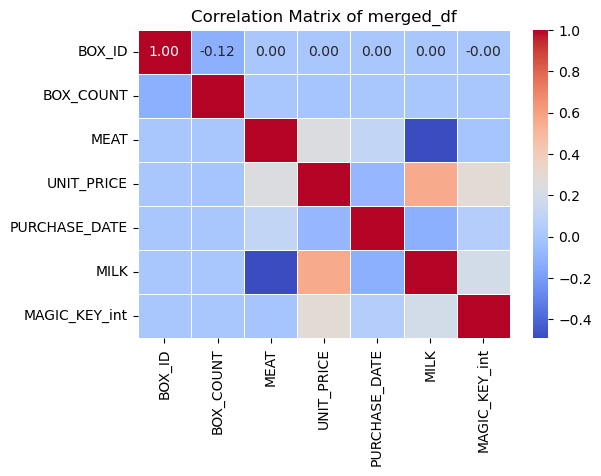

In [53]:
# Creating a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of merged_df')
plt.show()

Model Building: Build a predictive model to predict the quantity of meat purchased by customers in the first 15 days of March 2019 based on historical data.

In [54]:
# For model building spliting data into features (X) and target variable (y)
X = merged_df[['MAGIC_KEY_int', 'MONTH', 'YEAR', 'MILK', 'UNIT_PRICE']]
y = merged_df['MEAT']

In [55]:
# Train-test spliting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# Training a simple linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Predicting quantity of meat: 	After training the model, we'll use it to predict the quantity of meat purchased by customers in the first 15 days of March 2019, based on their unique magic keys


In [58]:
# Predicting quantity of meat for problem 3 data
problem_3_X = problem_3_extracted[['MAGIC_KEY_int', 'MONTH', 'YEAR', 'MILK', 'UNIT_PRICE']]
problem_3_predictions = model.predict(problem_3_X)
print("Predicted quantity of meat for problem 3 data:", problem_3_predictions)

Predicted quantity of meat for problem 3 data: [0.79770554 0.78886896 2.24247206 ... 2.60471702 0.63566505 1.20579906]


Evaluation:
  	Evaluainge the performance of the model using appropriate metrics such as mean squared error, root mean squared error, or R-squared score.  •	This step helps assess how well the model is performing in predicting the quantity of meat purchased by customers.


In [59]:
# Evaluating the model performance on test data
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.34851781576059604


In [60]:
# Combining 'MAGIC_KEY' from problem_3_extracted with 'MEAT' from problem_3_predictions
submission_df = pd.DataFrame({'MAGIC_KEY_int': problem_3_extracted['MAGIC_KEY_int'], 'MEAT': problem_3_predictions})
submission_df

,MAGIC_KEY_int,MEAT
39,2846283510849,0.797706
44,2862459646404,0.788869
183,2821041834423,2.242472
254,3084281765523,2.981027
265,3008982995647,3.022161
...,...,...
2454558,3108355834898,0.581215
2454574,3036865726034,0.620268
2455306,3088345299692,2.604717
2455335,3008680241485,0.635665


In [62]:
# Viewing the problem_3_df
problem_3_df

,MAGIC_KEY,MAGIC_KEY_int
0,2BCFE9C06A7,3010748745383
1,2C2A872B5A2,3035073000866
2,2C6A897671B,3052255274779
3,2C6F1287F53,3053472743251
4,2C658198CC9,3050904849609
...,...,...
5374,2C0804EFE49,3025809636937
5375,2C080B48630,3025816290864
5376,2C08243C58E,3025842455950
5377,2C082C78575,3025851090293


Preparing Submission File: We will create a submission file following the template provided in "sample submission 3.csv".

In [63]:
# Merging submission_df and problem_3_df based on MAGIC_KEY_int
merged_df_submission = pd.merge(problem_3_df, submission_df [['MEAT', 'MAGIC_KEY_int']], how='left', on='MAGIC_KEY_int')
merged_df_submission

,MAGIC_KEY,MAGIC_KEY_int,MEAT
0,2BCFE9C06A7,3010748745383,1.373817
1,2BCFE9C06A7,3010748745383,1.373817
2,2BCFE9C06A7,3010748745383,1.373817
3,2BCFE9C06A7,3010748745383,1.373817
4,2BCFE9C06A7,3010748745383,1.373817
...,...,...,...
15352,2C080B48630,3025816290864,0.697159
15353,2C08243C58E,3025842455950,2.258398
15354,2C082C78575,3025851090293,0.773045
15355,2C083B1F3E5,3025866453989,2.329240


In [64]:
# Selecting the required columns
result_df = merged_df_submission[['MAGIC_KEY', 'MEAT']]

# Now result_df contains only the required columns and rows
result_df

,MAGIC_KEY,MEAT
0,2BCFE9C06A7,1.373817
1,2BCFE9C06A7,1.373817
2,2BCFE9C06A7,1.373817
3,2BCFE9C06A7,1.373817
4,2BCFE9C06A7,1.373817
...,...,...
15352,2C080B48630,0.697159
15353,2C08243C58E,2.258398
15354,2C082C78575,0.773045
15355,2C083B1F3E5,2.329240


In [65]:
# Grouping by the MAGIC_KEY and sum the MEAT values
result_df = result_df.groupby('MAGIC_KEY').sum().reset_index()
result_df

,MAGIC_KEY,MEAT
0,2499B9E0C1C,3.415635
1,24D1CF7CA25,1.976337
2,24D279F5F06,1.898319
3,27D86DD37C9,8.171086
4,28CF0640F8B,5.484977
...,...,...
5374,2E224CE9C74,2.701656
5375,2E2336C7F7F,20.519544
5376,2E5E4A47984,1.277860
5377,2E6B1F1DFFA,2.538841


In [67]:
# Finding out MAGIC_KEY values in problem_3_df that are not present in result_df
difference = result_df[~result_df['MAGIC_KEY'].isin(problem_3_df['MAGIC_KEY'])]

# Printing the differences
print("Differences in MAGIC_KEY values between result_df and problem_3_df:")
print(difference)

Differences in MAGIC_KEY values between result_df and problem_3_df:
Empty DataFrame
Columns: [MAGIC_KEY, MEAT]
Index: []


In [68]:
# Saveing result_df to submission.csv
result_df.to_csv('submission.csv', index=False)
print("Saved result_df to the submission.csv")

Saved result_df to the submission.csv
